# Lead Scoring Case study

#### Problem Statement:
An education company named X Education sells online courses to industry professionals. This company get leads to its website from several websites and search engines like Google.The typical conversion rate is now 30%.The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance.The target lead conversion rate is to be around 80%.

#### Steps Involved:
Below are the steps involved in the Model building process.
* Importing Libraries and Loading Data
* Inspecting the DataFrame
* Data Cleaning
* EDA
* Dummy Variables Creation
* Test Train split
* Model Building
* Making Predictions using the final Model
* Model Evaluation
* Plotting the ROC Curve
* Prediction on test set
* Precision and Recall

### Step 1: Importing Libraries and Loading Data 

In [276]:
import warnings
warnings.filterwarnings('ignore')

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [278]:
lead_df=pd.read_csv('Leads.csv')

In [279]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the DataFrame

In [280]:
lead_df.shape

(9240, 37)

In [281]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [282]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [283]:
lead_df.City.value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [284]:
lead_df['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

### Step 3: Data Cleaning

<span style="color:Blue">As seen in above step ,we have 'Select' in many categorical variables and this can be replaced with null
</span>

In [285]:
# Converting all string values to lower case
lead_df=lead_df.applymap(lambda x : x.lower() if type(x) ==str else x)

In [286]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,select,select,unemployed,better career prospects,no,no,no,no,no,no,no,no,interested in other courses,low in relevance,no,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,select,select,unemployed,better career prospects,no,no,no,no,no,no,no,no,ringing,NaN,no,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,select,student,better career prospects,no,no,no,no,no,no,no,no,will revert after reading the email,might be,no,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,word of mouth,unemployed,better career prospects,no,no,no,no,no,no,no,no,ringing,not sure,no,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,select,other,unemployed,better career prospects,no,no,no,no,no,no,no,no,will revert after reading the email,might be,no,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [287]:
# Replace 'Select' in lead dataframe to null
lead_df=lead_df.replace('select',np.nan)

In [288]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,no,interested in other courses,low in relevance,no,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,no,ringing,NaN,no,no,NaN,NaN,02.medium,02.medium,15.0,15.0,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,NaN,student,better career prospects,no,no,no,no,no,no,no,no,will revert after reading the email,might be,no,no,potential lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,word of mouth,unemployed,better career prospects,no,no,no,no,no,no,no,no,ringing,not sure,no,no,NaN,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,NaN,other,unemployed,better career prospects,no,no,no,no,no,no,no,no,will revert after reading the email,might be,no,no,NaN,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [289]:
# check null values in each column
lead_df.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [290]:
# Check the null percentage
100*(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df))

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [291]:
# Drop columns that has null values greater than 40%
for i in lead_df.columns:
    if 100*(lead_df[i].isnull().sum()/len(lead_df)) > 40:
        lead_df.drop(i,axis=1 ,inplace=True)
    

In [292]:
lead_df.City.value_counts()

City
mumbai                         3222
thane & outskirts               752
other cities                    686
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: count, dtype: int64

In [293]:
lead_df.Tags.value_counts()

Tags
will revert after reading the email                  2072
ringing                                              1203
interested in other courses                           513
already a student                                     465
closed by horizzon                                    358
switched off                                          240
busy                                                  186
lost to eins                                          175
not doing further education                           145
interested  in full time mba                          117
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with eins                                     12
lost to o

In [294]:
#After looking at these columns with high null values , we can drop these 2 columns as well
lead_df.drop(columns=['Tags','City'],axis=1,inplace=True)

In [295]:
100*(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df))

Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Digital Advertisement                             0.000000
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
X Education Forums                                0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Newspaper                                         0.0000

<span style="color:Blue">We can see that these 4 columns have a high vaue of nulls and we can impute these nulls with "not available" 
</span>

In [296]:
lead_df['Specialization']=lead_df['Specialization'].fillna('not available')
lead_df['What matters most to you in choosing a course']=lead_df['What matters most to you in choosing a course'].fillna('not available')
lead_df['What is your current occupation']=lead_df['What is your current occupation'].fillna('not available')
lead_df['Country']=lead_df['Country'].fillna('not available')


In [297]:
100*(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df))

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Prospect ID                                      0.000000
Magazine                                         0.000000
A free copy of Mastering The Interview           0.000000
I agree to pay the amount through cheque         0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
Newspaper Article                                0.000000
What matters most to you in choosing a course    0.000000
Search        

In [298]:
# We can drop the null rows as the percent of null values are very minimal 
lead_df.dropna(inplace=True)

In [299]:
100*(lead_df.isnull().sum().sort_values(ascending=False)/len(lead_df))

Prospect ID                                      0.0
Lead Number                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                 

<span style="color:Blue">As we can see from the above data , we have handled null values by either imputing or dropping the records with null values. Now we have the dataframe that is void of any nulls . </span> 

In [300]:
lead_df.nunique().sort_values(ascending=False)

Prospect ID                                      9074
Lead Number                                      9074
Total Time Spent on Website                      1717
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            39
Lead Source                                        20
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
What is your current occupation                     7
What matters most to you in choosing a course       4
Lead Origin                                         4
X Education Forums                                  2
A free copy of Mastering The Interview              2
Through Recommendations                             2
Digital Advertisement                               2
Do Not Call                                         2
Converted                   

In [301]:
# Identifyiny columns that has only one unique value and these columns can be dropped
lead_df.drop(columns=['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [302]:
# Delete these 2 Id columns
lead_df.drop(columns=['Prospect ID','Lead Number'],axis=1,inplace=True)

In [303]:
lead_df.shape

(9074, 21)

### Step 4 : EDA

In [304]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [305]:
# list all categorical and numeric columns
catcols = list(lead_df.select_dtypes(include="object"))
numcols = list(lead_df.select_dtypes(exclude="object"))


In [306]:
#catcols
numcols

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

#### Univariate Analysis 

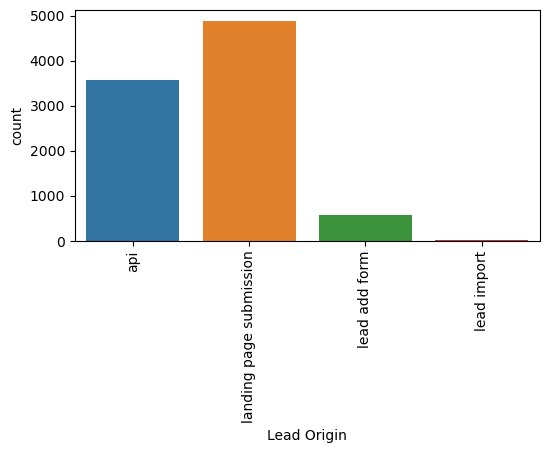

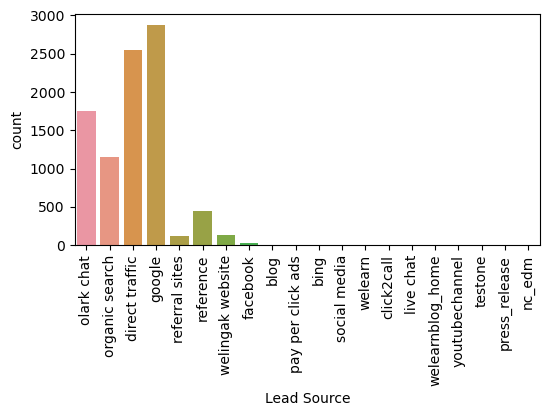

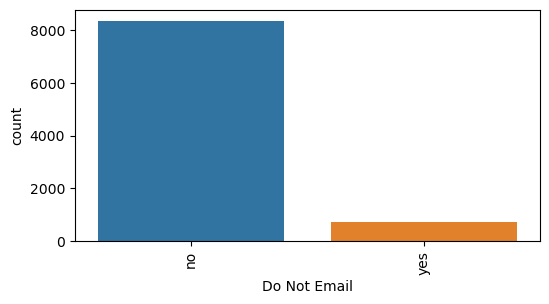

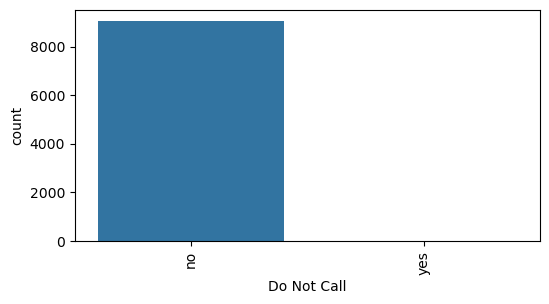

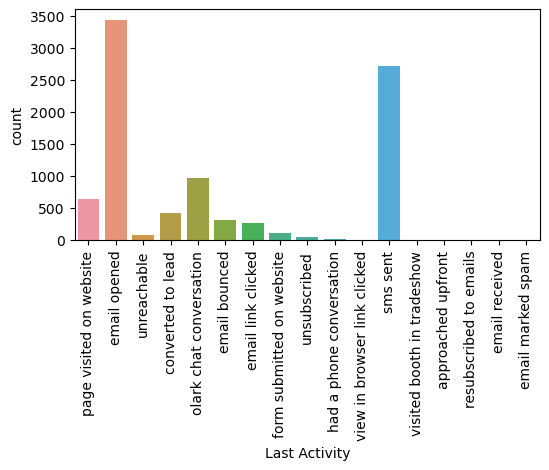

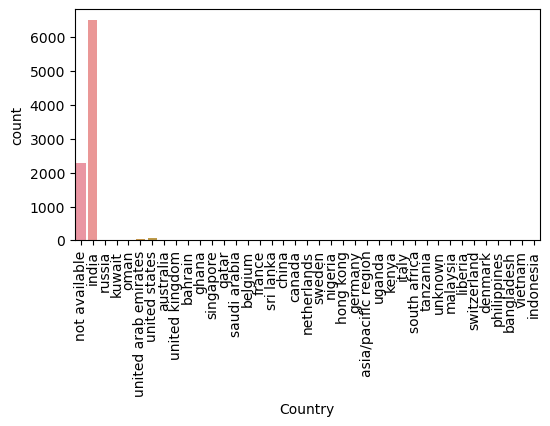

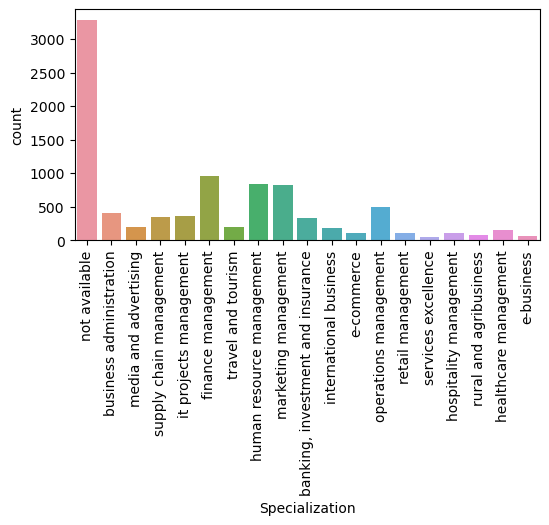

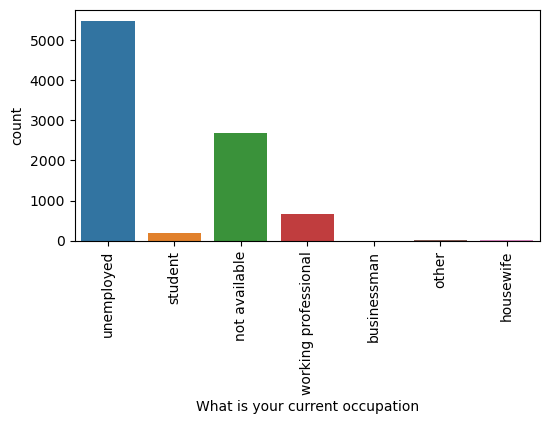

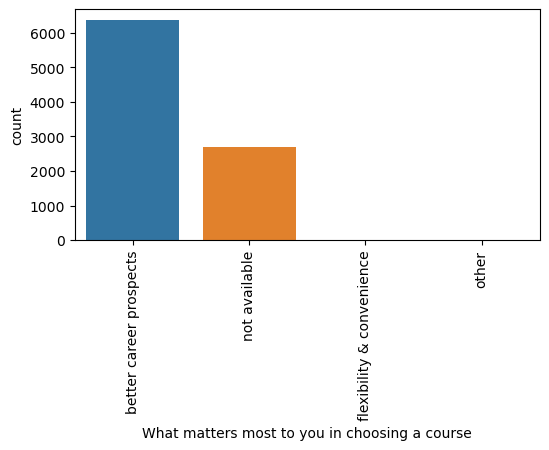

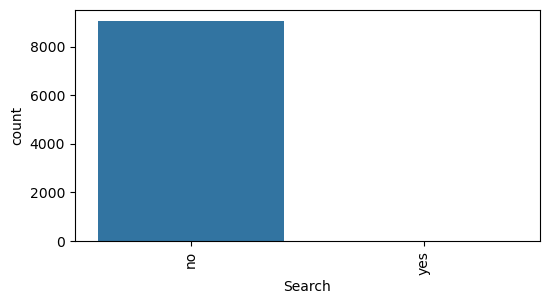

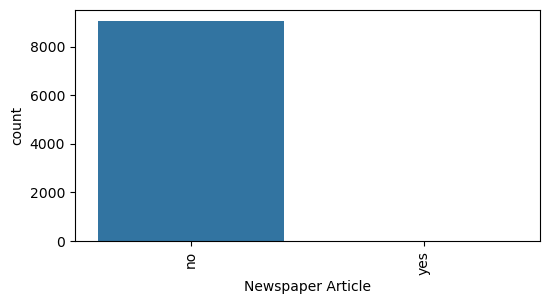

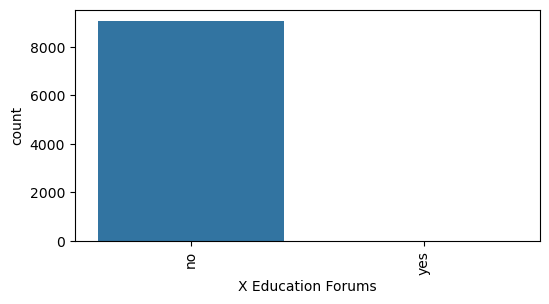

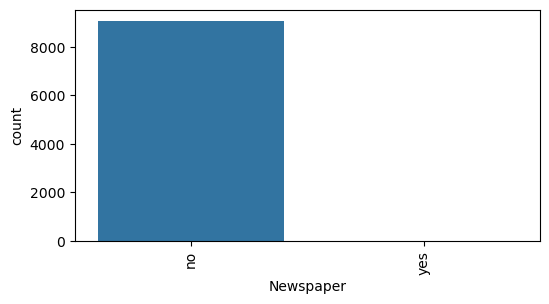

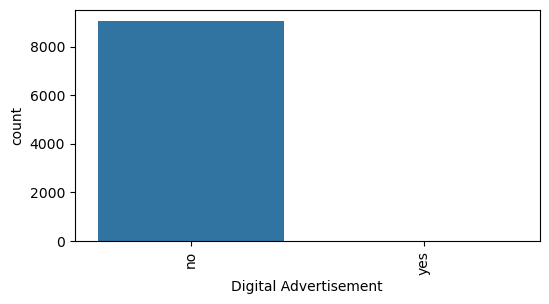

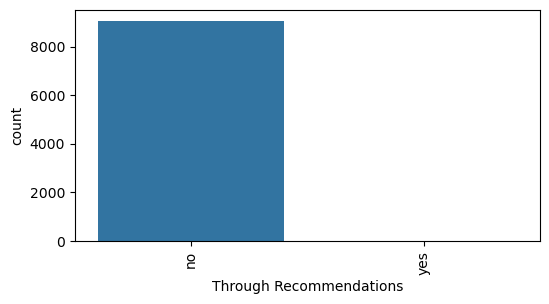

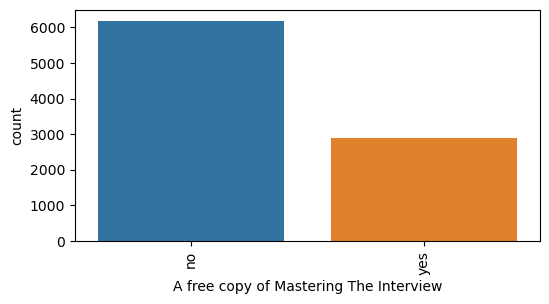

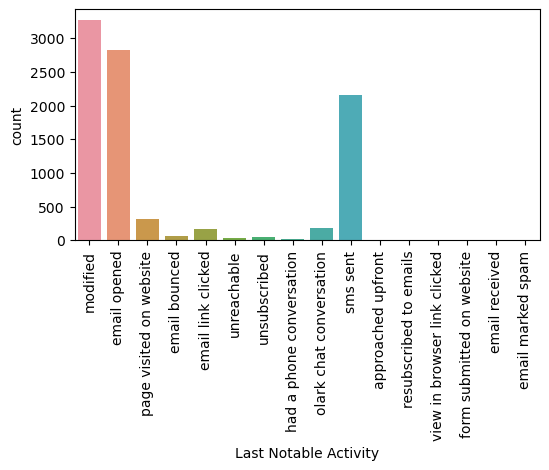

In [307]:
# Univariate analysis for categorical variables
for i in catcols:
    plt.figure(figsize=[6,3])
    sns.countplot(x=i,data=lead_df)
    plt.xticks(rotation=90)
    #plt.title(i)
    plt.show()
      

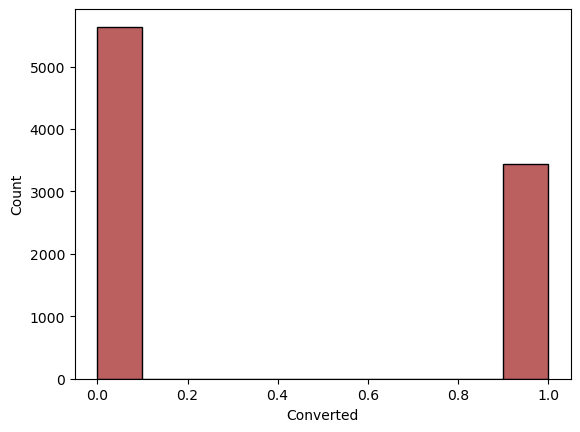

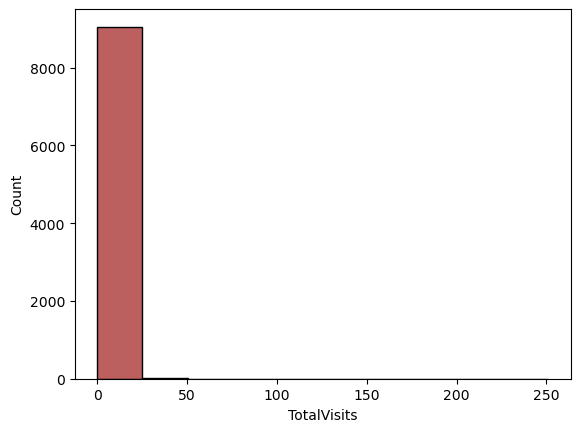

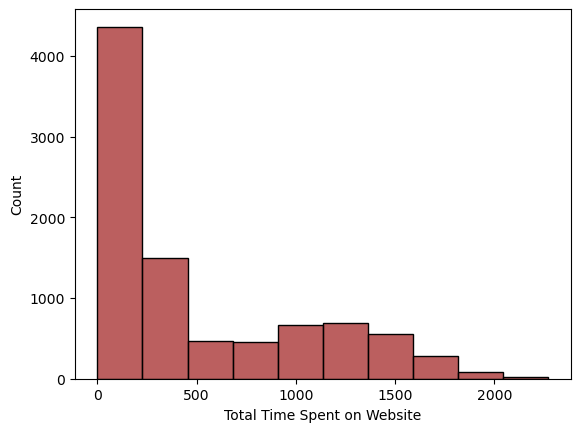

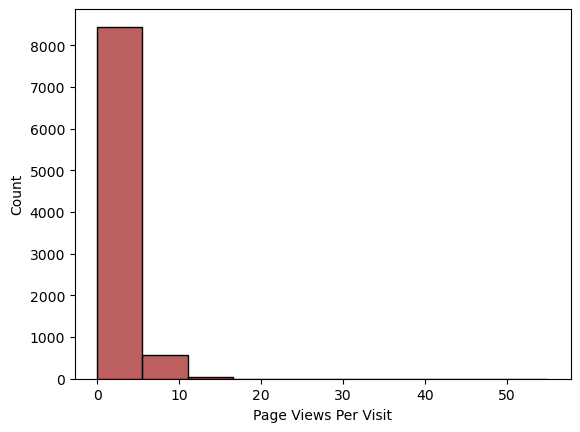

In [308]:
# Univariate analysis for numeric variables
for i in numcols:
    sns.histplot(x=i,data=lead_df,bins=10,color='brown')
    plt.show()

#### Bivariate Analysis

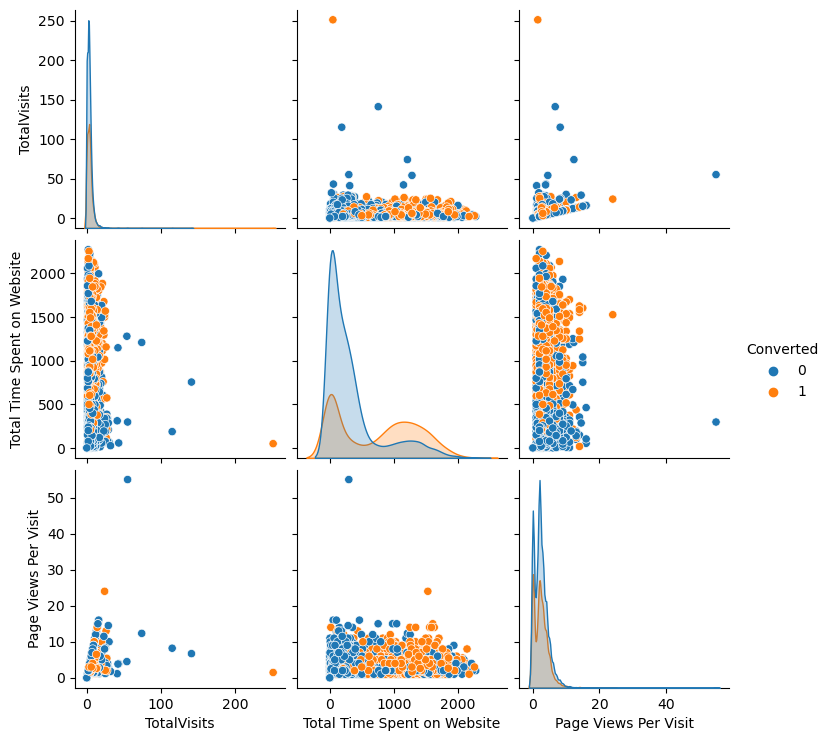

In [309]:
sns.pairplot(lead_df,hue='Converted',kind='scatter')
plt.show()

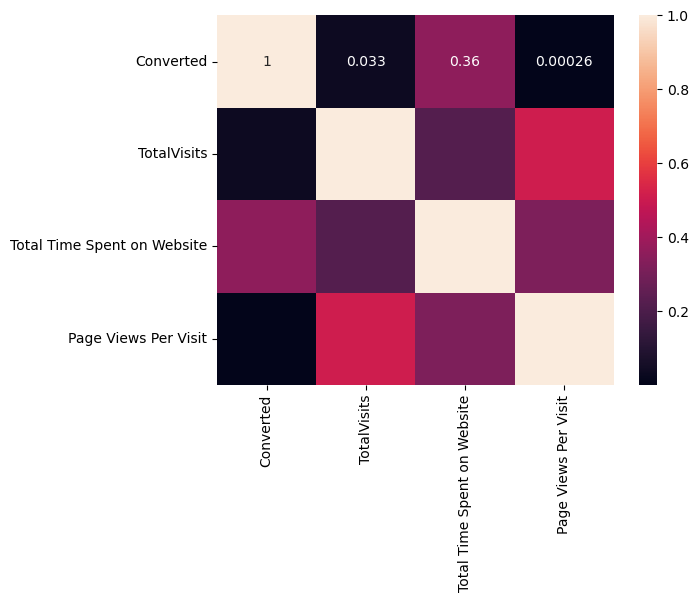

In [310]:
sns.heatmap(lead_df[numcols].corr(),annot=True)
plt.show()

In [311]:
#Outlier Analysis
lead_df[numcols].describe(percentiles=[0,.2,.5,.75,.9,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
0%,0.000000,0.000000,0.000000,0.000000
20%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000


<span style="color:Blue">
From the EDA analysis , we can observe the below
    
* The majority of the leads are from India
* Better career prospects is what the leads says that matters most to them
* Google followed by Direct traffic has produced the most leads to the X education
* we see most unemployed folks are looking to upskill
* There is no major outlier found with this dataset
* There are many columns that has minimum data and will be less relevent to our model analysis
</span>

### Step 5: Dummy Variables Creation 

In [312]:
pd.set_option('display.max_columns',None)
lead_df.head()


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not available,not available,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,not available,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,not available,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [313]:
#Create dummies for the identified categorical variables
lead_dummy=pd.get_dummies(lead_df[['Lead Origin','Lead Source','Do Not Email','Last Activity','Specialization','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity']],drop_first=True)
lead_dummy=lead_dummy.astype(int)
lead_df1=pd.concat([lead_df,lead_dummy],axis=1)
lead_df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not available,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_housewife,What is your current occupation_not available,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not available,not available,unemployed,better career prospects,no,no,no,no,no,no,no,modified,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,not available,unemployed,better career prospects,no,no,no,no,no,no,no,email opened,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,yes,email opened,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,landing page submission,dire

In [314]:
#Drop the redundant and unwanted columns that's not needed for our modeling
lead_df1.drop(columns=['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview','Last Notable Activity','Specialization_not available','What is your current occupation_not available'],axis=1,inplace=True)

In [315]:
lead_df1.shape

(9074, 81)

### Step 6 : Test Train split

In [316]:
# Create X and y dataset 
X=lead_df1.drop(['Converted'],axis=1)
y=lead_df1.Converted

In [317]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [318]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [319]:
# split the training and testing dataset in 70 to 30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=10)

In [320]:
# Scale the 3 numeric variables using Minmax Scaler 
scaler=MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,Lead Source_google,Lead Source_live chat,Lead Source_nc_edm,Lead Source_olark chat,Lead Source_organic search,Lead Source_pay per click ads,Lead Source_press_release,Lead Source_reference,Lead Source_referral sites,Lead Source_social media,Lead Source_testone,Lead Source_welearn,Lead Source_welearnblog_home,Lead Source_welingak website,Lead Source_youtubechannel,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email marked spam,Last Activity_email opened,Last Activity_email received,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_page visited on website,Last Activity_resubscribed to emails,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed,Last Activity_view in browser link clicked,Last Activity_visited booth in tradeshow,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,A free copy of Mastering The Interview_yes,Last Notable Activity_email bounced,Last Notable Activity_email link clicked,Last Notable Activity_email marked spam,Last Notable Activity_email opened,Last Notable Activity_email received,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<span style="color:Blue">
We will use Recursive Feature Elimination (RFE) in the next step to remove the weakest features that's not needed for our model build
</span>

### Step 7: Model Building

In [321]:
logreg=LogisticRegression()

In [322]:
# Running RFE to select best 15 variables for our model 
rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [323]:
#List the Feautures selected by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 26),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 40),
 ('Lead Source_blog', False, 43),
 ('Lead Source_click2call', False, 62),
 ('Lead Source_direct traffic', False, 14),
 ('Lead Source_facebook', False, 41),
 ('Lead Source_google', False, 16),
 ('Lead Source_live chat', False, 49),
 ('Lead Source_nc_edm', False, 64),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 15),
 ('Lead Source_pay per click ads', False, 65),
 ('Lead Source_press_release', False, 52),
 ('Lead Source_reference', False, 3),
 ('Lead Source_referral sites', False, 17),
 ('Lead Source_social media', False, 20),
 ('Lead Source_testone', False, 44),
 ('Lead Source_welearn', False, 46),
 ('Lead Source_welearnblog_home', False, 47),
 ('Lead Source_welingak website', True, 1),
 ('Lead Source_youtubechannel',

In [324]:
#Get all columns/features selected by RFE
rfe_cols=X_train.columns[rfe.support_]

In [325]:
rfe_cols

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_olark chat',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_unreachable'],
      dtype='object')

##### Assessing the model with StatsModels

In [326]:
#Restricting X_train to only the columns selected by RFE
X_train=X_train[rfe_cols]

In [327]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_had a phone conversation,Last Notable Activity_unreachable
1289,0.014184,0.612676,0,0,0,0,0,0,0,0,0,1,0,0,0
3604,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0
5584,0.042553,0.751761,0,0,0,1,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0,0,0,1,0,0,0,0,0,1,0,0,0


In [328]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Sun, 18 Aug 2024   Deviance:                       5270.1
Time:                        20:40:19   Pearson chi2:                 6.48e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3963
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4876      0.114    -30.661      0.000      -3.711      -3.265
TotalVisits                                              5.4367      1.437      3.782      0.000       2.619       8.254
Total Time Spent on Website                              4.6247      0.167     27.689      0.000       4.297       4.952
Lead Origin_lead add form                                3.7433      0.225     16.616      0.000       3.302       4.185
Lead Source_olark chat                                   1.5954      0.112     14.288      0.000       1.377       1.814
Lead Source_welingak website                             2.5982      1.033      2.515      0.012       0.574       4.623
Do Not Email_yes                                        -1.4275      0.170     -8.376      0.000      -1.762      -1.093
Last Activity_olark chat conversation                   -1.3875      0.168     -8.281      0.000      -1.716      -1.059
Last Activity_sms sent                                   1.2834      0.074     17.331      0.000       1.138       1.428
What is your current occupation_housewife               25.4080   3.09e+04      0.001      0.999   -6.05e+04    6.06e+04
What is your current occupation_other                    2.1868      0.755      2.895      0.004       0.706       3.667
What is your current occupation_student                  1.2705      0.227      5.604      0.000       0.826       1.715
What is your current occupation_unemployed               1.1800      0.086     13.680      0.000       1.011       1.349
What is your current occupation_working professional     3.7057      0.205     18.098      0.000       3.304       4.107
Last Notable Activity_had a phone conversation          24.0110   2.17e+04      0.001      0.999   -4.25e+04    4.26e+04
Last Notable Activity_unreachable                        1.8344      0.601      3.051      0.002       0.656       3.013
========================================================================================================================
"""

##### Checking VIFs

In [329]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.07
0,TotalVisits,1.85
2,Lead Origin_lead add form,1.59
7,Last Activity_sms sent,1.54
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
12,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


<span style="color:Blue">
The VIF values look good but the p-values doesnt look good for few features and Last Notable Activity_had a phone conversation variable will be dropped
</span>

In [330]:
X_train.drop(['Last Notable Activity_had a phone conversation'],axis=1,inplace=True)

In [331]:
#Refit the model after dropping one of the features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.8
Date:                Sun, 18 Aug 2024   Deviance:                       5285.6
Time:                        20:40:19   Pearson chi2:                 6.48e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3948
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4831      0.114    -30.629      0.000      -3.706      -3.260
TotalVisits                                              5.6046      1.450      3.866      0.000       2.763       8.446
Total Time Spent on Website                              4.6104      0.167     27.675      0.000       4.284       4.937
Lead Origin_lead add form                                3.7375      0.225     16.591      0.000       3.296       4.179
Lead Source_olark chat                                   1.5910      0.112     14.249      0.000       1.372       1.810
Lead Source_welingak website                             2.5984      1.033      2.516      0.012       0.574       4.623
Do Not Email_yes                                        -1.4324      0.170     -8.409      0.000      -1.766      -1.099
Last Activity_olark chat conversation                   -1.3919      0.168     -8.310      0.000      -1.720      -1.064
Last Activity_sms sent                                   1.2754      0.074     17.245      0.000       1.130       1.420
What is your current occupation_housewife               23.4021   1.14e+04      0.002      0.998   -2.23e+04    2.23e+04
What is your current occupation_other                    2.1799      0.755      2.887      0.004       0.700       3.660
What is your current occupation_student                  1.2690      0.227      5.600      0.000       0.825       1.713
What is your current occupation_unemployed               1.1852      0.086     13.753      0.000       1.016       1.354
What is your current occupation_working professional     3.7035      0.205     18.099      0.000       3.302       4.105
Last Notable Activity_unreachable                        1.8251      0.601      3.036      0.002       0.647       3.003
========================================================================================================================
"""

In [332]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_lead add form,1.59
7,Last Activity_sms sent,1.54
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
12,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


<span style="color:Blue">'What is your current occupation_housewife' variable will be dropped as p value signifies that it has no influence on target variable
</span>

In [333]:
X_train.drop(['What is your current occupation_housewife'],axis=1,inplace=True)

In [334]:
#Refit the model after dropping one of the features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.3
Date:                Sun, 18 Aug 2024   Deviance:                       5302.6
Time:                        20:40:19   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3932
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4533      0.113    -30.579      0.000      -3.675      -3.232
TotalVisits                                              5.5427      1.444      3.838      0.000       2.712       8.373
Total Time Spent on Website                              4.6048      0.166     27.690      0.000       4.279       4.931
Lead Origin_lead add form                                3.7501      0.225     16.651      0.000       3.309       4.192
Lead Source_olark chat                                   1.5802      0.111     14.187      0.000       1.362       1.798
Lead Source_welingak website                             2.5821      1.033      2.500      0.012       0.558       4.607
Do Not Email_yes                                        -1.4360      0.170     -8.437      0.000      -1.770      -1.102
Last Activity_olark chat conversation                   -1.3974      0.167     -8.348      0.000      -1.725      -1.069
Last Activity_sms sent                                   1.2672      0.074     17.164      0.000       1.123       1.412
What is your current occupation_other                    2.1567      0.755      2.857      0.004       0.677       3.636
What is your current occupation_student                  1.2456      0.226      5.502      0.000       0.802       1.689
What is your current occupation_unemployed               1.1632      0.086     13.582      0.000       0.995       1.331
What is your current occupation_working professional     3.6797      0.204     18.008      0.000       3.279       4.080
Last Notable Activity_unreachable                        1.8153      0.601      3.022      0.003       0.638       2.993
========================================================================================================================
"""

In [335]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_lead add form,1.58
7,Last Activity_sms sent,1.53
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
11,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


<span style="color:Blue">All the VIF values look good and the p-values of all feautures are below 0.05. We can have this as our final model</span>



### Step 8:Making Predictions using the final Model

In [336]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.64788325, 0.13318019, 0.23294642, 0.13318019, 0.49508996,
       0.77776483, 0.16731088, 0.98274125, 0.77298038, 0.1492489 ])

In [337]:
# Data frame with already available convertion rate and probablity of predicted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.647883
1,0,0.133180
2,0,0.232946
3,0,0.133180
4,0,0.495090


In [338]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.647883,1
1,0,0.133180,0
2,0,0.232946,0
3,0,0.133180,0
4,0,0.495090,0


### Step 9: Model Evaluation

In [339]:
#create Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3437,  458],
       [ 747, 1709]], dtype=int64)

In [340]:
# Predicted     not_converted converted
# Actual
# not_converted      3437       458
# converted          747        1709

In [341]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.810266099826799

<span style="color:Blue">We have got an accuracy of 81% from this model</span>

In [342]:
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false negatives
FN = confusion[1,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of true positive
TP = confusion[1,1]


In [343]:
# Calculate the sensitivity
TP/(TP+FN)

0.6958469055374593

In [344]:
# Calculate the specificity
TN/(TN+FP)

0.8824133504492939

<span style="color:Blue">With the current cut off of Conversion_Prob as 0.5 we get around 81% accuracy, sensitivity as 70% and specificity as 88%.</span>

### Step 10: Plotting the ROC Curve

In [345]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [346]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

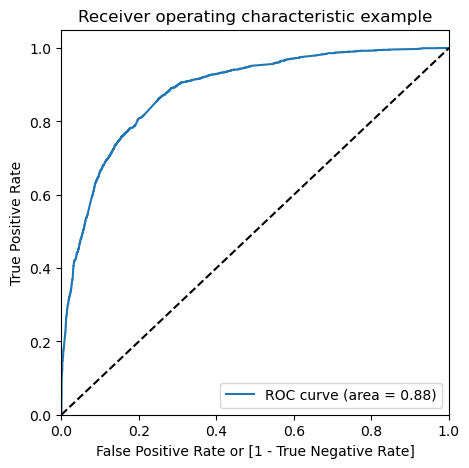

In [347]:
# Call the ROC function to draw the ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<span style="color:Blue">The area under ROC curve is 0.88 and it looks good</span>

<span style="color:Blue">The previous cutoff of 0.5 is randomly selected and we will find the optimum cut off in the next step </span>

In [348]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0


In [349]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.577232,0.983306,0.321181
0.2,0.2,0.758306,0.912866,0.660847
0.3,0.3,0.788852,0.872557,0.736072
0.4,0.4,0.809321,0.765879,0.836714
0.5,0.5,0.810266,0.695847,0.882413
0.6,0.6,0.802708,0.627850,0.912965
0.7,0.7,0.773579,0.504072,0.943517
0.8,0.8,0.753582,0.413681,0.967908
0.9,0.9,0.706660,0.260179,0.988190


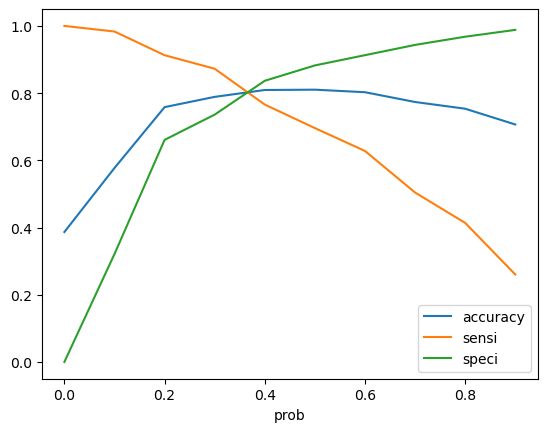

In [350]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

<span style="color:Blue">From the curve above, 0.35 is the optimum point identified as a cutoff probability</span>

In [351]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0,1


In [352]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8031806014800819

In [353]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3127,  768],
       [ 482, 1974]], dtype=int64)

In [354]:
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false negatives
FN = confusion2[1,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of true positive
TP = confusion2[1,1]

In [355]:
# Calculating the sensitivity
TP/(TP+FN)

0.8037459283387622

In [356]:
# Calculating the specificity
TN/(TN+FP)

0.8028241335044929

<span style="color:Blue">
    
#### With the current cut off of Conversion_Prob as 0.35 we get accuracy, sensitivity and specificity as just over 80%
</span>

### Step 11: Prediction on test set

In [357]:
# Scaling numeric values of the Test dataset
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [358]:
# copying all the columns from the final train model
cols = X_train.columns

In [359]:
# Restricting the columns in test dataset to match with our final model built
X_test = X_test[cols]

In [360]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,0,0,0,0,0,0,0,0,1,0,0
7212,1.0,0.028369,0.001320,0,0,0,0,0,1,0,0,0,1,0
2085,1.0,0.000000,0.000000,1,0,1,0,0,0,0,0,1,0,0
4048,1.0,0.028369,0.617077,0,0,0,0,0,1,0,0,1,0,0
4790,1.0,0.028369,0.005282,0,0,0,0,0,0,0,0,1,0,0


In [361]:
# Prediction of test set 
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.456551
1,1,0.839834
2,1,0.982741
3,1,0.878240
4,0,0.108266


In [362]:
# Making prediction using the optimum cut off of 0.35 selected
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.456551,1
1,1,0.839834,1
2,1,0.982741,1
3,1,0.878240,1
4,0,0.108266,0


In [363]:
# Check the overall accuracy of test 
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8079324274697025

In [364]:
# Create confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1404,  340],
       [ 183,  796]], dtype=int64)

In [365]:
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false negatives
FN = confusion2[1,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of true positive
TP = confusion2[1,1]

In [366]:
# Calculating the sensitivity
TP/(TP+FN)

0.8130745658835546

In [367]:
# Calculating the specificity
TN/(TN+FP)

0.805045871559633

<span style="color:Blue">
    
#### With the current cut off of Conversion_Prob as 0.35 we get accuracy, sensitivity and specificity as ~ 81% for test dataset
</span>

### Step 12: Precision and Recall

In [368]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3437,  458],
       [ 747, 1709]], dtype=int64)

In [369]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7886479003230272

In [370]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6958469055374593

<span style="color:Blue">
    
#### With the current cut off of Conversion_Prob as 0.35 we get Precision as 79% and Recall as 70%
</span>

#### Precision and recall tradeoff


In [371]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [372]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

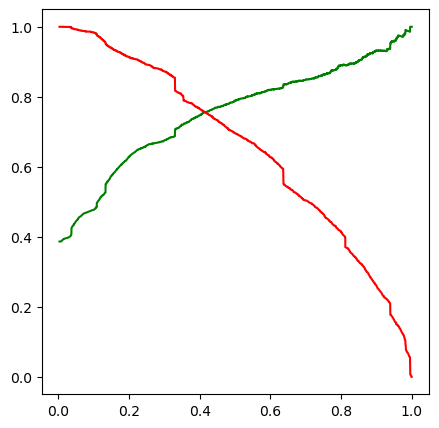

In [373]:
plt.figure(figsize=[5,5])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [374]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0,1


In [375]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8108959219020627

In [376]:
# Creating confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3302,  593],
       [ 608, 1848]], dtype=int64)

In [377]:
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false negatives
FN = confusion2[1,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of true positive
TP = confusion2[1,1]

In [378]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7570667759115117

In [379]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.752442996742671

<span style="color:Blue">
    
#### With the current cut off as 0.42 we get Accuracy as 81% ,Precision as 76% and Recall as 75% for training dataset.
</span>

#### Prediction on Test Dataset

In [380]:
# Prediction of test set 
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.456551
1,1,0.839834
2,1,0.982741
3,1,0.878240
4,0,0.108266


In [381]:
# Making prediction using cut off 0.42
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.456551,1
1,1,0.839834,1
2,1,0.982741,1
3,1,0.878240,1
4,0,0.108266,0
...,...,...,...
2718,1,0.108386,0
2719,0,0.364110,0
2720,0,0.133180,0
2721,1,0.820744,1


In [382]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8149100257069408

In [383]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1479,  265],
       [ 239,  740]], dtype=int64)

In [384]:
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false negatives
FN = confusion2[1,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of true positive
TP = confusion2[1,1]

In [385]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.736318407960199

In [386]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7558733401430031

<span style="color:Blue">

#### With the current cut off as 0.42 we get Accuracy as 81%, Precision as 74% and Recall as 76% for test dataset
</span>

#### Observations:

###### Below are the features that influence the Conversation rate of leads in X education and hence they need to focus on these features: 

* Total Visits
* Total Time Spent On Website
* Lead Origin is lead add form
* When the current occupation is working professional/other/student/unemployed
* Lead Source is olark chat or welingak website
* Do Not Email option is set as yes
* Last Activity was olark chat conversation or SMS
